## Exercise 13

Implement k-means soft clustering with online update, adopting the Euclidean distance as dissimilarity metric. Given the dataset data3.csv, apply the algorithm using $k = 3$ and $\eta = 0.1$ until the algorithm converges. As initial centroids use $x_{32}, x_{33}, x_{123}$, where the subscripts define the indexes of the points in the dataset. After convergence of the algorithm, compute the membership of $x_{10}$ with respect to each centroid and also plot the dataset using different colors for $x_{10}, x_{32}, x_{33}, x_{123}$.

In [54]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math

In [55]:
frame = pd.read_csv("data3.csv")

In [56]:
def plot(frame):
    x = frame.iloc[0]
    y = frame.iloc[1]
    z = frame.iloc[:,-1]
    z_min, z_max = np.abs(z).min(), np.abs(z).max()
    
    plt.scatter(x,y,z)
    
    plt.show()

In [57]:
def norm_cal(x,y):
    return math.sqrt(x**2 + y**2)

In [58]:
np.random.seed(1)
k = 3

In [59]:
def eul_distance(x, y):
    res = math.sqrt((x[0] - y[0])**2 + (x[1] - y[1])**2) 
    return res

In [80]:
# works onyl with k = 2
def k_means(k, df, neo, epsilon):
    x = df["x"]
    y = df["y"]
    membership = [0]*len(df)
    newlist = list(zip(x,y,membership))
    frame = pd.DataFrame(data = newlist, columns=['x', 'y', 'membership'])

    #init centroid
    centroids = []
    centroids.append(frame.iloc[32])
    centroids.append(frame.iloc[73])
    centroids.append(frame.iloc[123])
    print(centroids)
    
    iteration = True
    while iteration:
        # fuzzy membership for every centroid
        tmpcentroids = centroids
        for i in range(k):
            centroid = centroids[i]
            centroid = [centroid[0], centroid[1]]
            tot = 0
            delta = 0

            # find tot
            for elem in range(len(frame)):
                point = frame.iloc[elem]
                point = [point[0], point[1]]
                distance = eul_distance(centroid, point)
                tot += math.pow(math.e, (-distance))

            # find membership
            for elem in range(len(frame)):
                point = frame.iloc[elem]
                point = [point[0], point[1]]
                distance = eul_distance(centroid, point)
                num = math.pow(math.e, (-distance))
                membership = num / tot
                frame.iloc[elem,-1] = membership 

                delta += neo * membership * ((point[0]-centroid[0]) + (point[1]-centroid[1]))

            centroids[i] += delta
            plot(frame, centroid)
            
        centroid = centroids[0]
        centroid = [centroid[0], centroid[1]]
        tmpcentroid = tmpcentroids[0]
        tmpcentroid = [tmpcentroid[0], tmpcentroid[1]]
        if (centroid[0] - tmpcentroid[0]) < epsilon:
            iteration = False
        tmpcentroids = centroids

[x             31.613582
y             81.075340
membership     0.000000
Name: 32, dtype: float64, x             58.330450
y             84.131839
membership     0.000000
Name: 73, dtype: float64, x             52.138753
y             71.024211
membership     0.000000
Name: 123, dtype: float64]


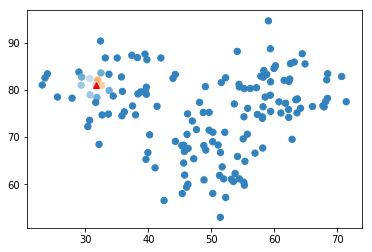

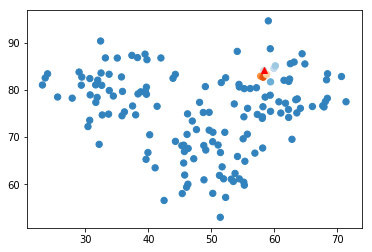

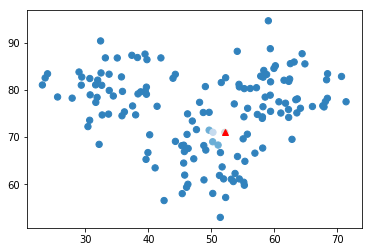

0.0


In [82]:
def plot(frame, prototype):
    x = frame.iloc[:,0]
    y = frame.iloc[:, 1]
    z = frame.iloc[:,-1]
    z_min, z_max = np.abs(z).min(), np.abs(z).max()

    plt.plot(prototype[0], prototype[1], '^', c="red")
    plt.scatter(x, y, c=z, s=40, cmap='tab20c')
    plt.show()
    
k_means(3, frame, 0.1, 0.01)